In [17]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout,Activation
from keras.layers import Reshape, Flatten
from keras.layers import Convolution2D,Conv2D, MaxPooling2D, Lambda
from keras.models import Sequential
from keras.callbacks import *
from keras import optimizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.applications import *
#from keras.utils import to_categorical
from keras.utils import np_utils
from keras.losses import binary_crossentropy
from keras.utils.generic_utils import CustomObjectScope
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt
import glob
import random
import os
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import datetime, time, json
from time import time

%matplotlib inline

In [18]:
path1 = r'C:\Users\TejaDikshitulu\Documents\COURSEWORK\Comp_Bio_Research\eggs_dataset'
path2 = r'C:\Users\TejaDikshitulu\Documents\COURSEWORK\Comp_Bio_Research\eggs_dataset_resized'

In [19]:
listing = os.listdir(path1)
num_samples = np.size(listing)
#print(num_samples)

img_rows = 50
img_cols = 50
for file in listing:
    im = Image.open(path1 + '\\' + file)
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    gray.save(path2 + '\\' + file, "JPEG")
    


In [20]:
imlist = os.listdir(path2)

im1 = np.array(Image.open(path2 + '\\' + imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

In [21]:
immatrix = np.array([np.array(Image.open(path2 + '\\' + im2)).flatten() for im2 in imlist], 'f')

#print(immatrix[1])

In [22]:
label = np.ones((num_samples,),dtype = int)

#print(label)

os.chdir(r'C:\Users\TejaDikshitulu\Documents\COURSEWORK\Comp_Bio_Research\eggs_dataset_resized')
for file in glob.glob('*'):
    if "Army" in file:
        img_index = imlist.index(file)
        label[img_index] = 0
    elif "CLFM" in file:
        img_index = imlist.index(file)
        label[img_index] = 1
        #count = count + 1
    elif "Muk01" in file:
        img_index = imlist.index(file)
        label[img_index] = 2
    elif "MUK01" in file:
        img_index = imlist.index(file)
        label[img_index] = 2
    elif "SBB" in file:
        img_index = imlist.index(file)
        label[img_index] = 3

#print(len(label))
#print(label)

In [23]:
#print(label)

data, Label = shuffle(immatrix,label, random_state=2)
train_data = [data, Label]


print(train_data[0])

[[249. 255. 255. ... 255. 255. 255.]
 [255. 252. 249. ... 255. 255. 255.]
 [253. 254. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 254. ... 255. 255. 255.]]


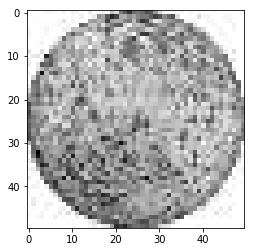

In [24]:
img = immatrix[102].reshape(img_rows, img_cols)
plt.imshow(img)
plt.imshow(img, cmap = 'gray')
#print(train_data[0].shape)
#print(train_data[1].shape)


In [25]:
(X,y) = (train_data[0], train_data[1])

X_train,X_test, Y_train,Y_test =train_test_split(X, y, test_size = 0.1, random_state=4)

X_train= X_train.reshape(X_train.shape[0],1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test/= 255


def create_pairs(x, digit_indices):
    pairs = []
    labels = []
    
    n = min([len(digit_indices[d]) for d in range(nb_classes)]) - 1
    #print(n)
    #print("I am inside create pairs", x[3])
    for d in range(nb_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, nb_classes)
            dn = (d + inc) % nb_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    #print("printing pairs", pairs)
    return np.array(pairs), np.array(labels)

In [27]:
digit_indices = [np.where(Y_train == i)[0] for i in range(nb_classes)]
tr_pairs, tr_y = create_pairs(X_train, digit_indices)

#digit_indices = [np.where(Y_val == i)[0] for i in range(nb_classes)]
#val_pairs, val_y = create_pairs(X_val, digit_indices)

digit_indices_test = [np.where(Y_test == i)[0] for i in range(nb_classes)]
test_pairs, test_y = create_pairs(X_test, digit_indices_test)


In [ ]:
#train_list = X_train.tolist()

#print("to_list is done")

#img1 = []
#img2 = []

#for i in range(len(X_train)-1):
#    for j in range(i+1, len(X_train)):
#        img1.append(train_list[i][:])
#        img2.append(train_list[j][:])


#print("img1, img2", type(img1), type(img2))
#m = len(img1)
#n = len(img2)

#img1_array = np.asarray(img1)
#print("I do reshape", img1_array.shape)
#img2_array = np.array(img2).reshape(n,1,img_rows,img_cols)
#print("I do reshape", img2_array.shape)

In [ ]:
#print(len(X_train1))
#print(len(y_train))
#print(y_train.shape)

#x = y_train[0] - y_train[1]

#z = np.array(x).reshape(1,1)

#print(z.shape)
#print(y_train[0])
#print(y_train[1])
#print(y_train[200])

In [ ]:
#img1_train = X_train[:,0]
#Q2_train = X_train[:,1]

#print(img1_train)
#print(Q2_train)

In [28]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.maximum(K.sum(K.square(x - y), axis=1, keepdims=True), K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [29]:
VALIDATION_SPLIT = 0.1


In [26]:
batch_size = 10
nb_classes = 4
nb_epoch = 20

img_rows, img_cols = 50,50

img_channels = 1

nb_filters = 324
nb_pool = 2
nb_conv = 3

MODEL_WEIGHTS_FILE = 'egg_pairs_weights.h5'

In [30]:
input_shape = X_train.shape[1:]
model = Sequential()
model.add(Conv2D(nb_filters, nb_conv, border_mode = 'valid', input_shape=(1, img_rows, img_cols), data_format = 'channels_first'))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='sigmoid'))


left_input = Input(input_shape)
right_input = Input(input_shape)

processed_a = model(left_input)
processed_b = model(right_input)

distance = Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([processed_a, processed_b])

siamese_net = Model([left_input, right_input], distance)


C:\Users\TejaDikshitulu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(324, 3, input_shape=(1, 50, 50..., data_format="channels_first", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
siamese_net.summary()

In [37]:
epochs = 20
#rms = keras.optimizers.RMSprop()
opt = keras.optimizers.SGD(lr = 0.0005)
siamese_net.compile(loss=contrastive_loss, optimizer=opt, metrics=[accuracy])

# train
patience = 5
#model_name = 'MobileNet'
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_epoch_end(self, batch, logs={}):
        self.losses.append((logs.get('loss'), logs.get("val_loss")))
        
history = LossHistory()
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(MODEL_WEIGHTS_FILE, verbose=0, save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.3, patience=2, verbose=1)

h = siamese_net.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=32,
          epochs=epochs,
          validation_split=VALIDATION_SPLIT,
          callbacks=[history, early_stopping,checkpointer, reduce_lr],
          shuffle= True)

Train on 144 samples, validate on 16 samples
Epoch 1/20
144/144 [==============================] - 51s 352ms/step - loss: 0.3041 - accuracy: 0.4375 - val_loss: 0.4816 - val_accuracy: 0.5000
Epoch 2/20
144/144 [==============================] - 56s 387ms/step - loss: 0.2819 - accuracy: 0.5208 - val_loss: 0.4816 - val_accuracy: 0.5000
Epoch 3/20
144/144 [==============================] - 47s 325ms/step - loss: 0.2784 - accuracy: 0.4861 - val_loss: 0.4816 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
Epoch 4/20
144/144 [==============================] - 50s 349ms/step - loss: 0.2865 - accuracy: 0.4306 - val_loss: 0.4816 - val_accuracy: 0.5000
Epoch 5/20
144/144 [==============================] - 54s 377ms/step - loss: 0.2936 - accuracy: 0.4375 - val_loss: 0.4815 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 4.500000213738531e-05.
Epoch 6/20
144/144 [==============================] - 50s 349ms/step

In [ ]:
siamese_net.load_weights(MODEL_WEIGHTS_FILE)
loss, accuracy = siamese_net.evaluate([test_pairs[:,0], test_pairs[:,1]], test_y, verbose=1)
print('loss = {0:.4f}, accuracy = {1:.4f}'.format(loss, accuracy))
    

In [ ]:
#training_start_time = time()

#train_list = X_train.tolist()

#for i in range(len(X_train)-1):
#    for j in range(i+1, len(X_train)):
        #img1.append(train_list[i][:])
        #img2.append(train_list[j][:])
#        img1 = X_train[i][:]
#        img2 = X_train[j][:]
#        img1_train = img1.reshape(1,1, img_rows, img_cols)
#        img2_train = img2.reshape(1,1, img_rows, img_cols)
#        y_1 = y_train[i] - y_train[j]
#        y_train1 = np.array(y_1).reshape(1,1)
#        malstm_trained = siamese_net.fit([img1_train, img2_train],y_train1,nb_epoch=nb_epoch, verbose = 1, batch_size = batch_size,callbacks=callbacks_list)

        
#print("Training time finished.\n{} epochs in {}".format(nb_epoch, datetime.timedelta(seconds=time()-training_start_time)))
#m = len(img1)
#n = len(img2)
#img1_array = np.array(img1).reshape(m,1,img_rows,img_cols)
#img2_array = np.array(img2).reshape(n,1,img_rows,img_cols)

#for img1 in np.nditer(X_train, flags = ['external_loop']):
#    for img2 in np.nditer(X_train, flags = ['external_loop']):
 #       print(type(img1))
        #print(img1)
 #       print(img1.shape)
        #print(len(X_train[0]))
        #print(X_train.shape)
  #      img1_train = img1.reshape(X_train[0],1, img_rows, img_cols)
   #     print(img1_train.shape)
        #img2_r = image2.reshape(1, img_rows, img_cols)
        #img1_train = img1_r[238,:,:,:]
        #img2_train = img2_r[238,:,:,:]
    



In [ ]:
#input_shape = X_train.shape[1:]
#left_input = Input(input_shape)
#right_input = Input(input_shape)

#convnet = Sequential()

#convnet.add(Convolution2D(nb_filters, nb_conv, border_mode = 'valid', input_shape=(1, img_rows, img_cols), data_format = 'channels_first'))
#convout1 = Activation('relu')
#convnet.add(convout1)
#convnet.add(Convolution2D(nb_filters,nb_conv,nb_conv))
#convout2 = Activation('relu')
#convnet.add(convout2)
#convnet.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
#convnet.add(Dropout(0.5))

#convnet.add(Flatten())
#convnet.add(Dense(128))
#convnet.add(Activation('relu'))
#convnet.add(Dropout(0.5))
#convnet.add(Dense(nb_classes))

#processed_a = convnet(left_input)
#processed_b = convnet(right_input)

#distance = Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([processed_a, processed_b])

#siamese_net = Model([left_input, right_input], distance)

#L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
#L1_distance = L1_layer([encoded_l, encoded_r])

#prediction = Dense(1, activation = 'sigmoid')(L1_distance)

#malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([question11_op, question22_op])

#siamese_net.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

#filepath="weights.best.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

In [ ]:
#print(digit_indices[0])
#print(digit_indices[1])
#print(digit_indices[2])
#print(digit_indices[3])
#print(digit_indices[4])
#print(min([len(digit_indices[d]) for d in range(nb_classes)]))


#print(type(tr_pairs))

#print(tr_pairs)

In [ ]:
#max_val_acc, idx = max((val, idx) for (idx, val) in enumerate(malstm_trained.history['val_acc']))
#print('Maximum accuracy at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(max_val_acc)